In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
import scipy.stats as stats

# PART_A: Automobile Part Manufacturing RFM Analysis

### Problem Statement:

An automobile parts manufacturing company has collected data on transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your data science skills to find the underlying buying patterns of the customers, provide the company with suitable insights about their customers, and recommend customized marketing strategies for different segments of customers. 

In [4]:
df = pd.read_excel('Sales_Data.xlsx')

In [5]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [7]:
df.shape

(2747, 20)

In [8]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,2019-05-13 21:56:17.211503360,1757.085912,100.691664
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2018-01-06 00:00:00,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,2018-11-08 00:00:00,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,2019-06-24 00:00:00,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2019-11-17 00:00:00,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,2020-05-31 00:00:00,3562.000000,214.000000
std,91.877521,9.762135,42.042548,4.230544,1838.953901,NaN,819.280576,40.114802


In [10]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [17]:
df.duplicated().sum() 

0

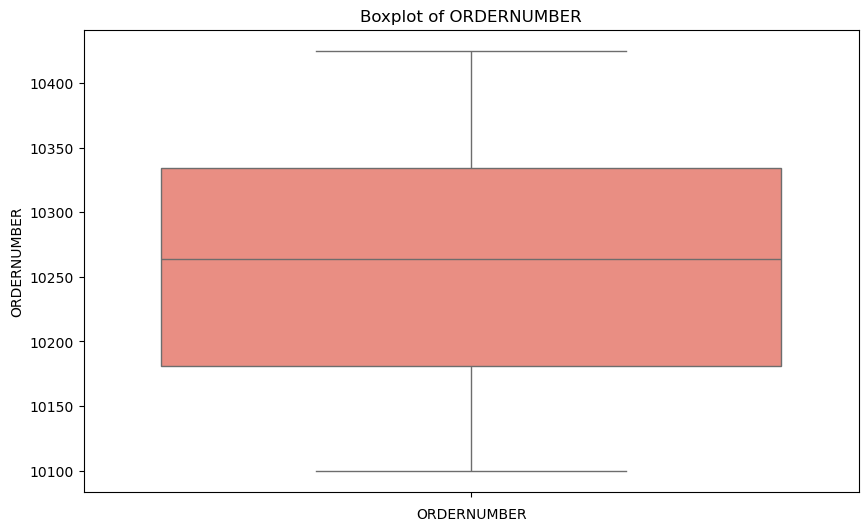

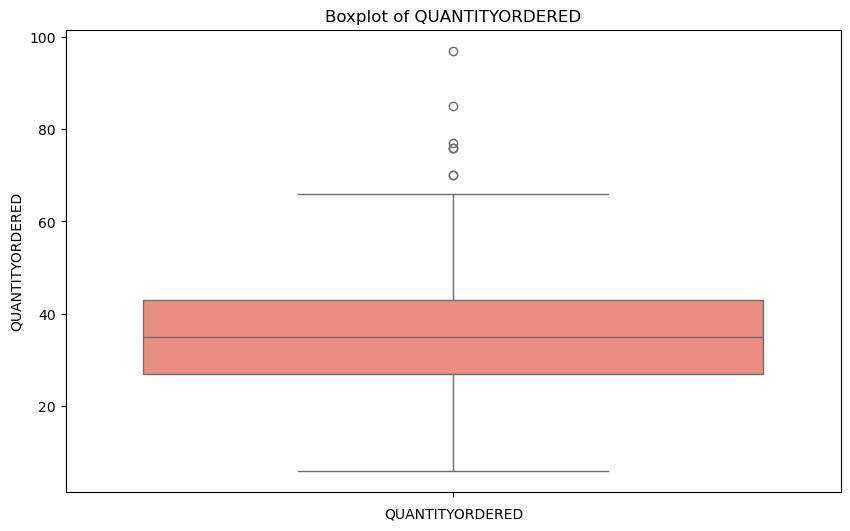

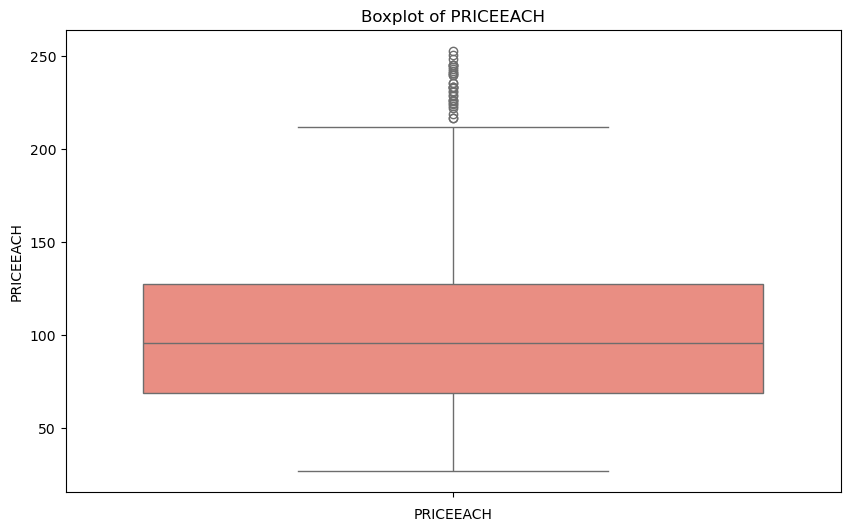

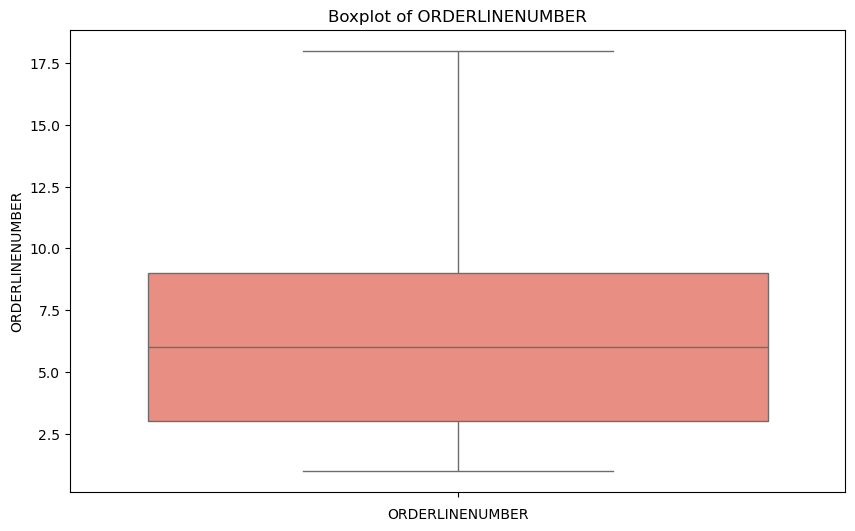

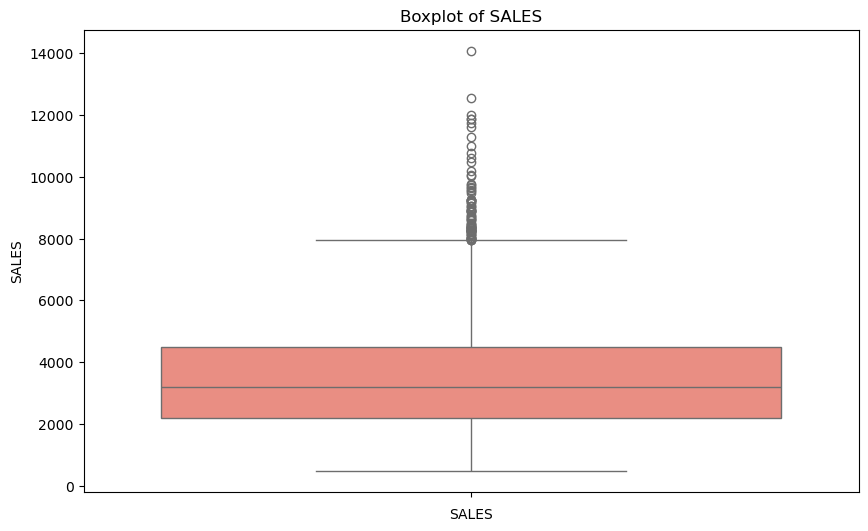

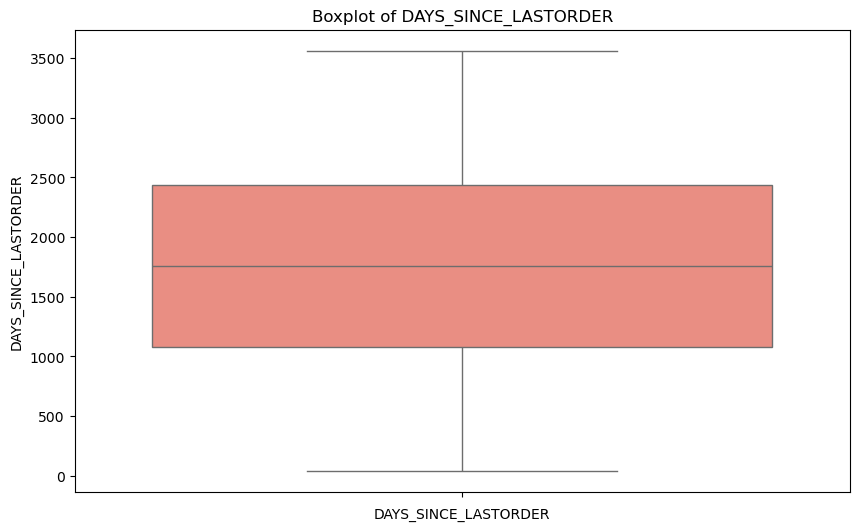

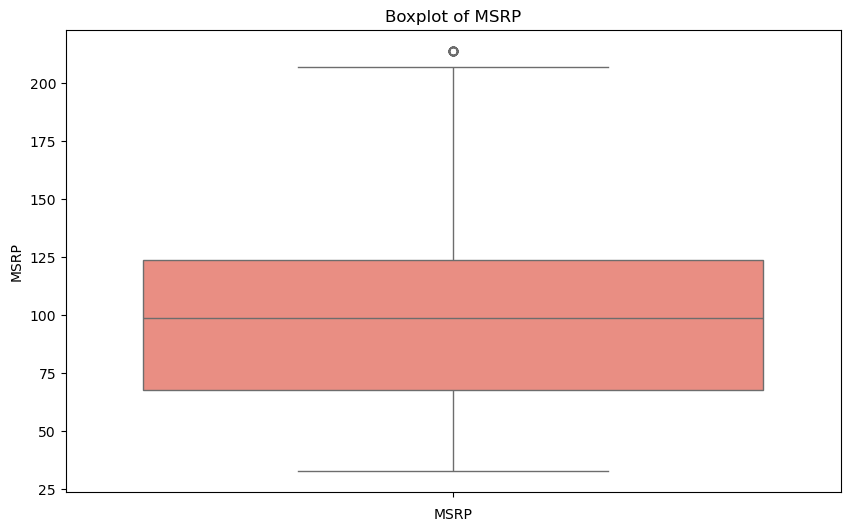

In [21]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 6))  # Adjusted figure size for better proportions
        sns.boxplot(y=df[column], color='Salmon')  # Use y for the boxplot
        plt.title(f'Boxplot of {column}')  # Add a title for clarity
        plt.xlabel(column)  # Label the x-axis with the column name
        plt.show()

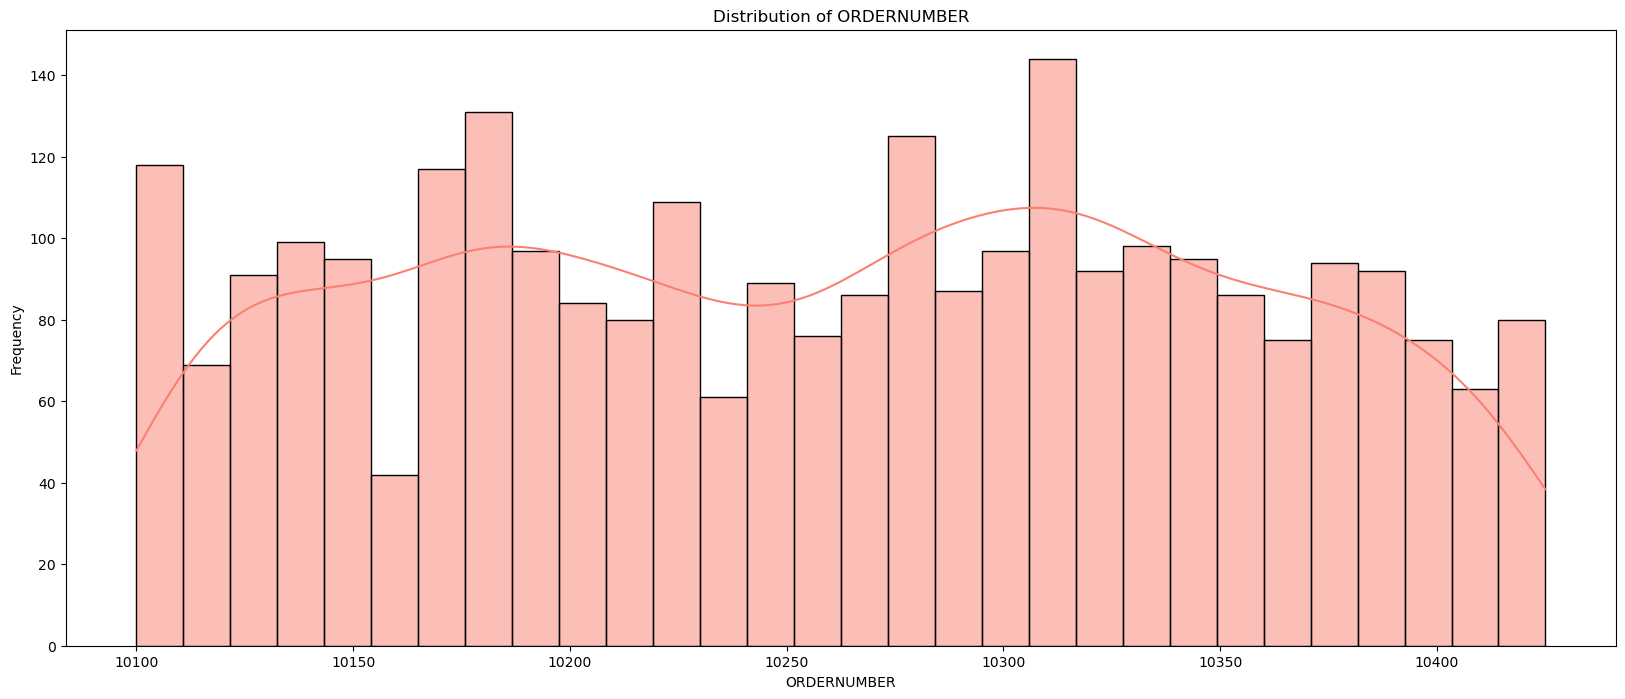

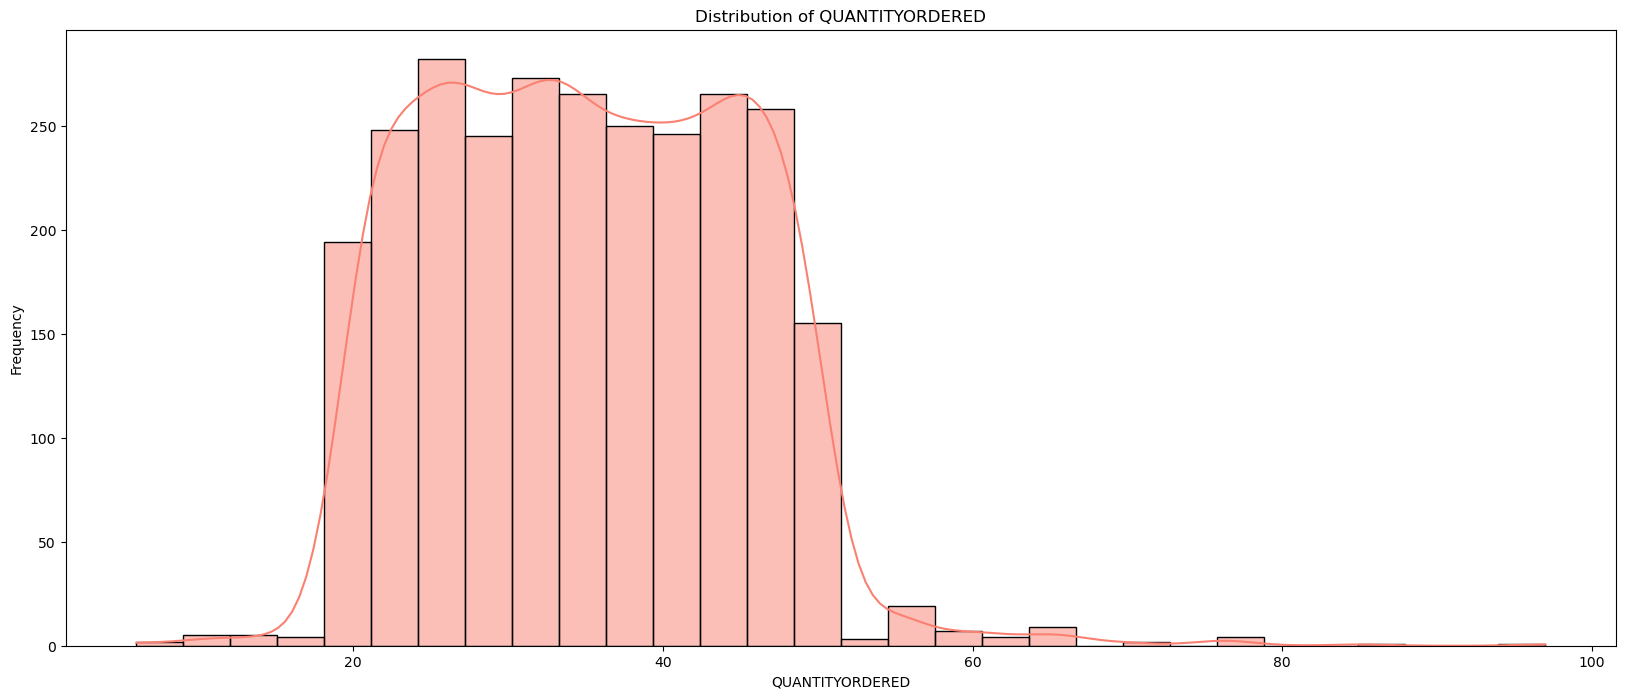

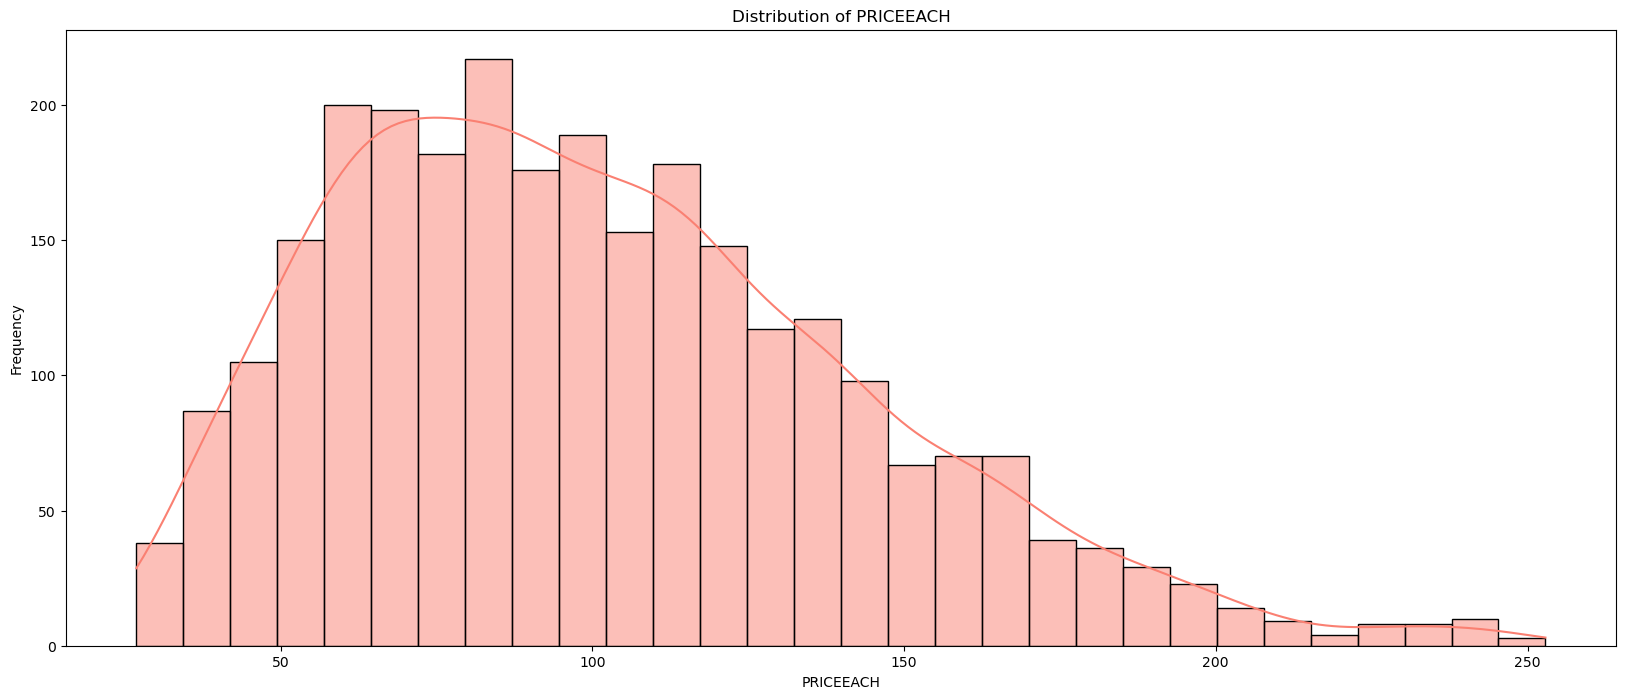

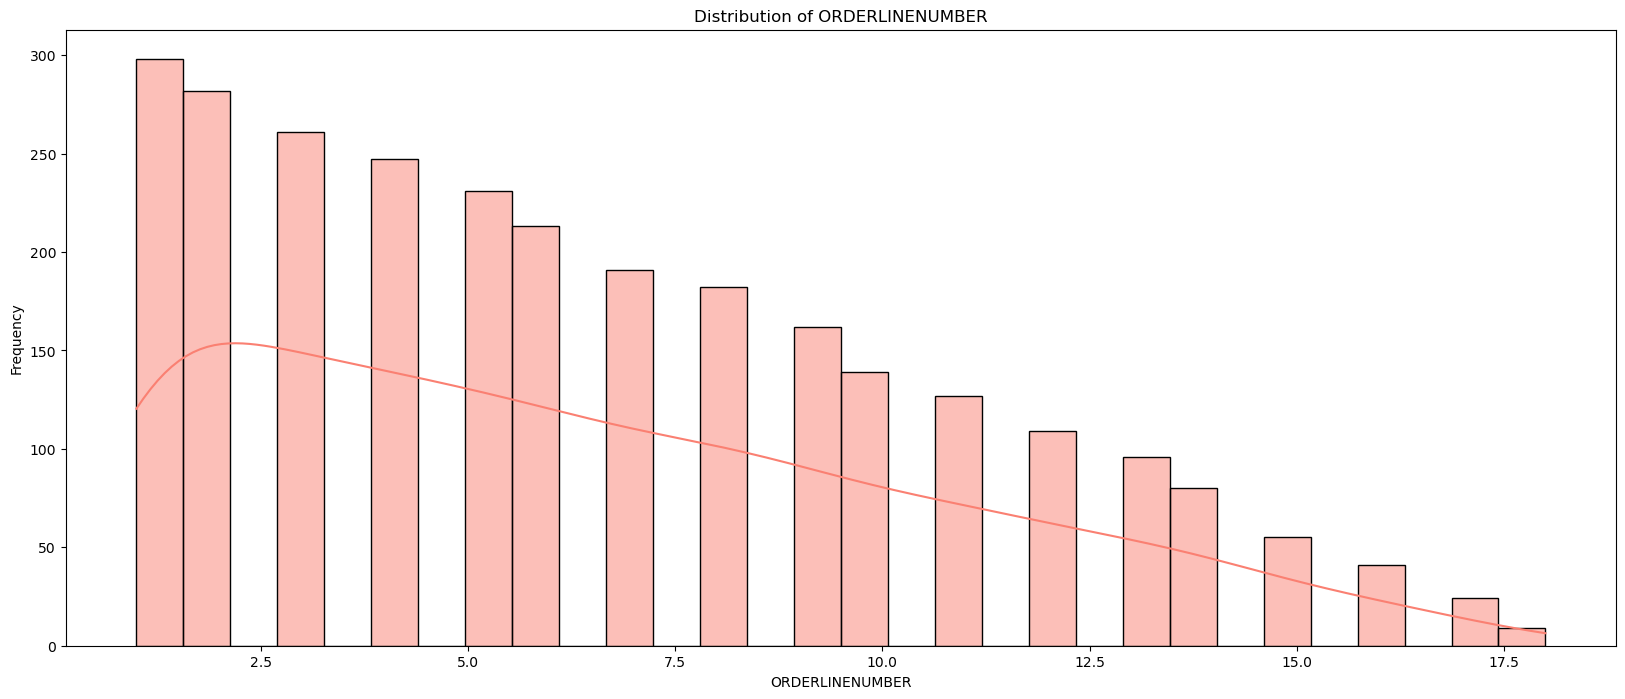

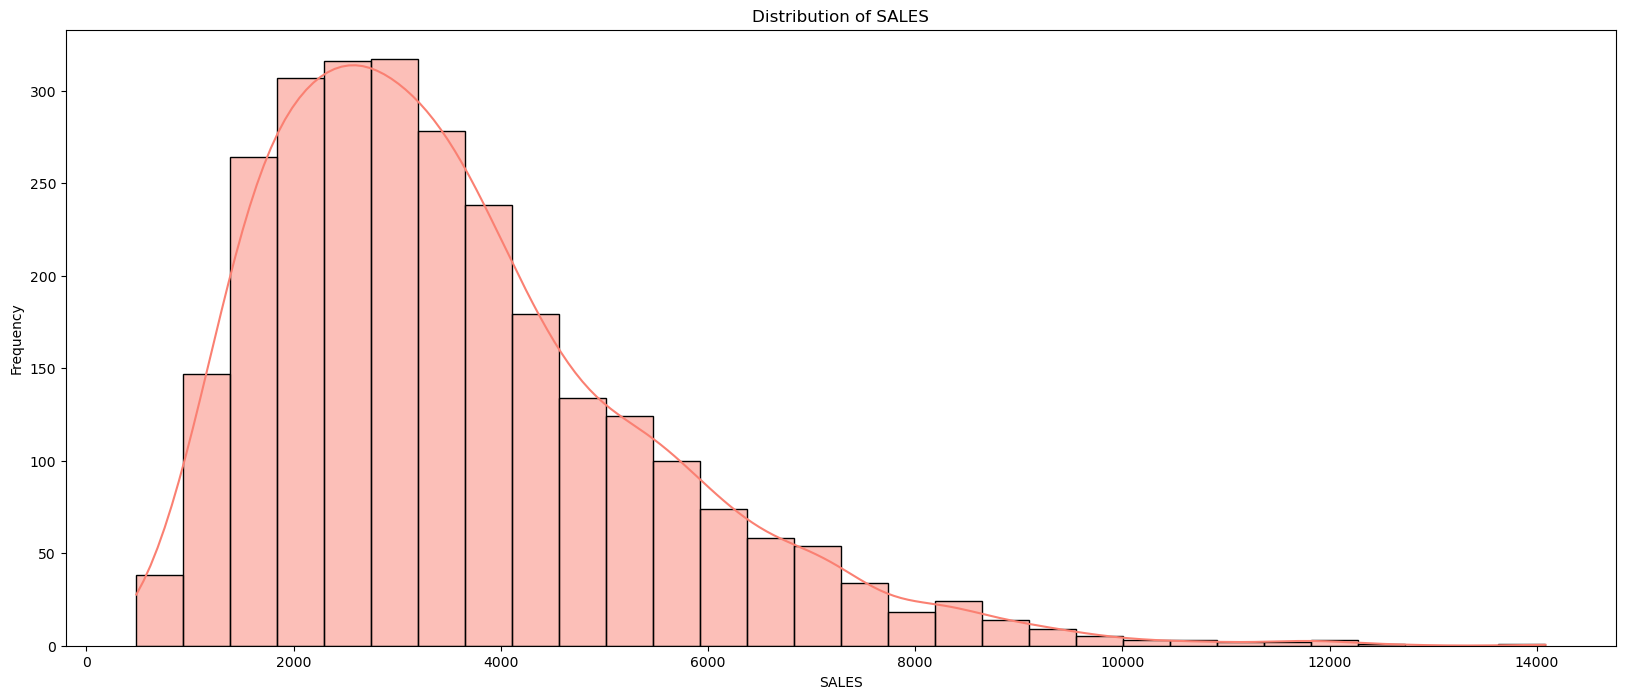

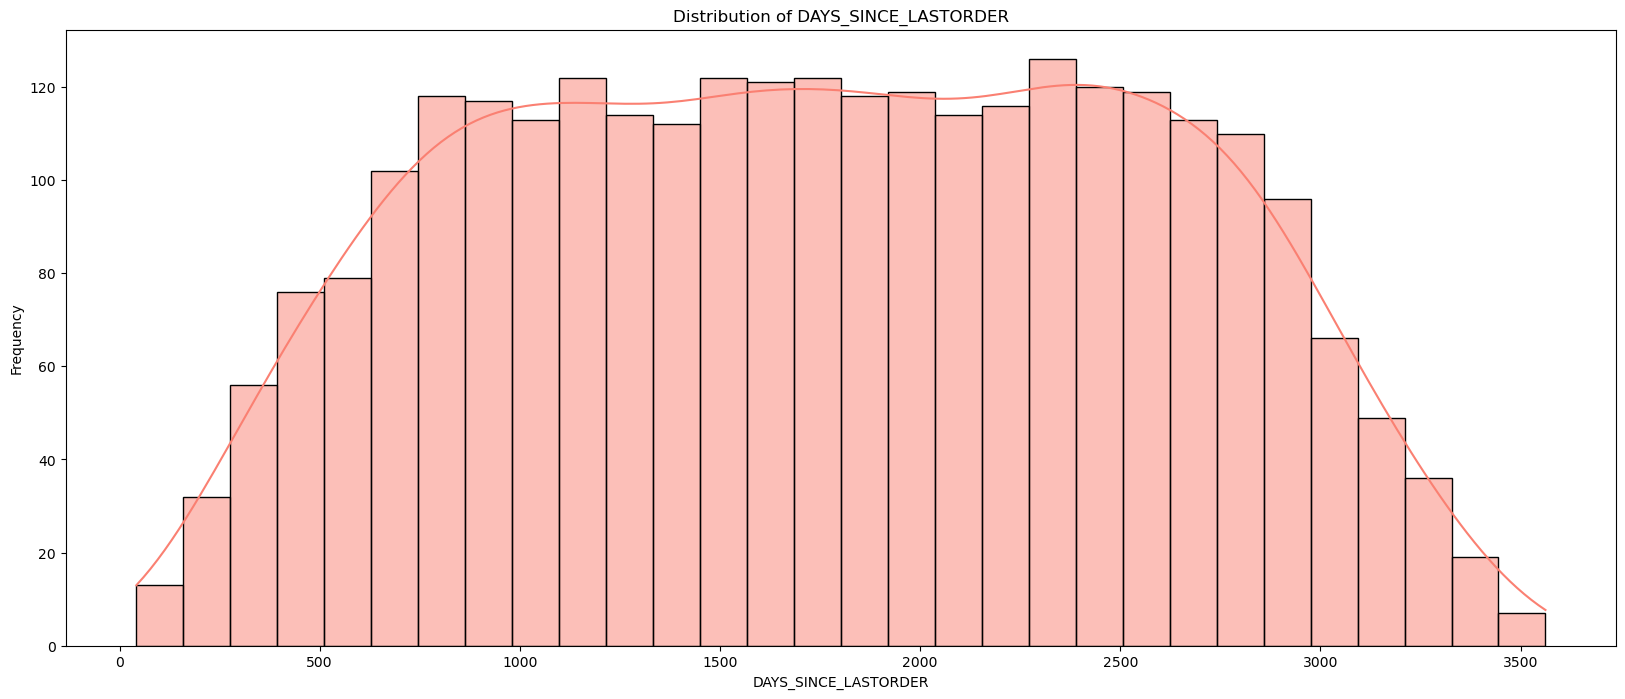

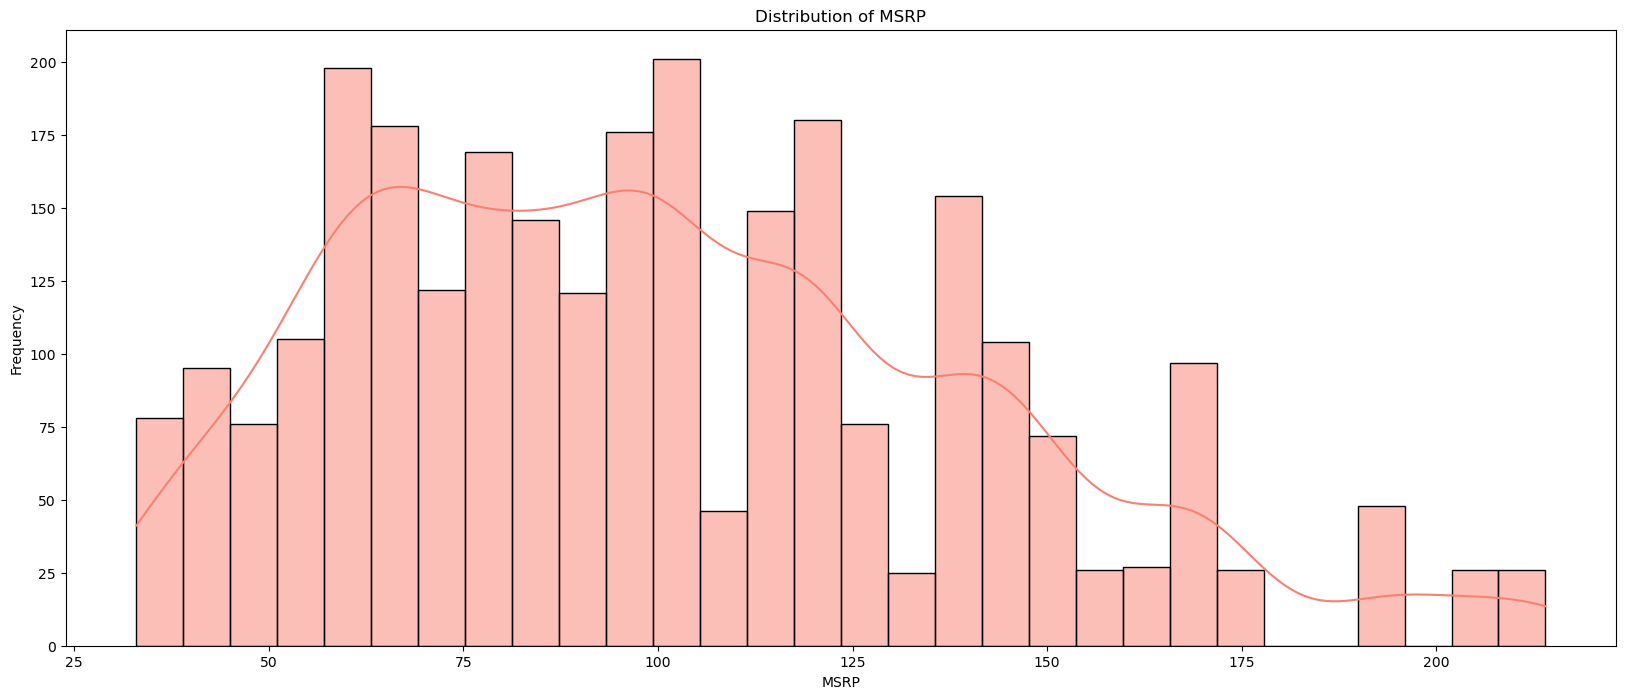

In [23]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(20, 8))  # Set the figure size
        sns.histplot(df[column], kde=True, bins=30, color='Salmon')  # Histogram with KDE overlay
        plt.title(f'Distribution of {column}')  # Add a title for clarity
        plt.xlabel(column)  # Label the x-axis with the column name
        plt.ylabel('Frequency')  # Label the y-axis
        plt.show()

In [37]:
df[df.QUANTITYORDERED >=70].sort_values(by='QUANTITYORDERED',ascending=False).head(15)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
399,10405,97,93.280000,5,9048.16,2020-04-14,447,Shipped,Classic Cars,115,S12_4675,Mini Caravy,88.60.1555,"24, place Kluber",Strasbourg,67000,France,Citeaux,Frederique,Large
2511,10401,85,88.750000,10,7543.75,2020-04-03,2570,On Hold,Planes,99,S700_2466,Tekni Collectables Inc.,2015559350,7476 Moss Rd.,Newark,94019,USA,Brown,William,Large
2614,10401,77,92.000000,9,7084.00,2020-04-03,2673,On Hold,Planes,80,S700_3167,Tekni Collectables Inc.,2015559350,7476 Moss Rd.,Newark,94019,USA,Brown,William,Large
571,10407,76,185.300000,2,14082.80,2020-04-22,611,On Hold,Vintage Cars,170,S18_1749,The Sharp Gifts Warehouse,4085553659,3086 Ingle Ln.,San Jose,94217,USA,Frick,Sue,Large
1656,10407,76,94.500000,6,7182.00,2020-04-22,1696,On Hold,Classic Cars,90,S24_2766,The Sharp Gifts Warehouse,4085553659,3086 Ingle Ln.,San Jose,94217,USA,Frick,Sue,Large
1930,10405,76,154.469737,3,11739.70,2020-04-14,1978,Shipped,Classic Cars,140,S24_3856,Mini Caravy,88.60.1555,"24, place Kluber",Strasbourg,67000,France,Citeaux,Frederique,Large
1609,10412,70,121.400000,10,8498.00,2020-05-03,1638,Shipped,Trucks and Buses,127,S24_2300,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Large
1931,10419,70,132.000000,8,9240.00,2020-05-17,1946,Shipped,Classic Cars,140,S24_3856,Salzburg Collectables,6562-9555,Geislweg 14,Salzburg,5020,Austria,Pipps,Georg,Large


# PART_B : Grocery Store Market Basket Analysis

### Problem Statement:

A grocery store shared the transactional data with you. Your job is to conduct a thorough analysis of Point of Sale (POS) data, identify the most commonly occurring sets of items in the customer orders, and provide recommendations through which a grocery store can increase its revenue by popular combo offers & discounts for customers.

In [55]:
df = pd.read_csv('dataset_group.csv')

In [57]:
df.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [59]:
df.tail()

,Date,Order_id,Product
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent
20640,26-02-2020,1139,shampoo


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [63]:
df.shape

(20641, 3)

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [67]:
df.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [79]:
df.duplicated().sum() 

4730

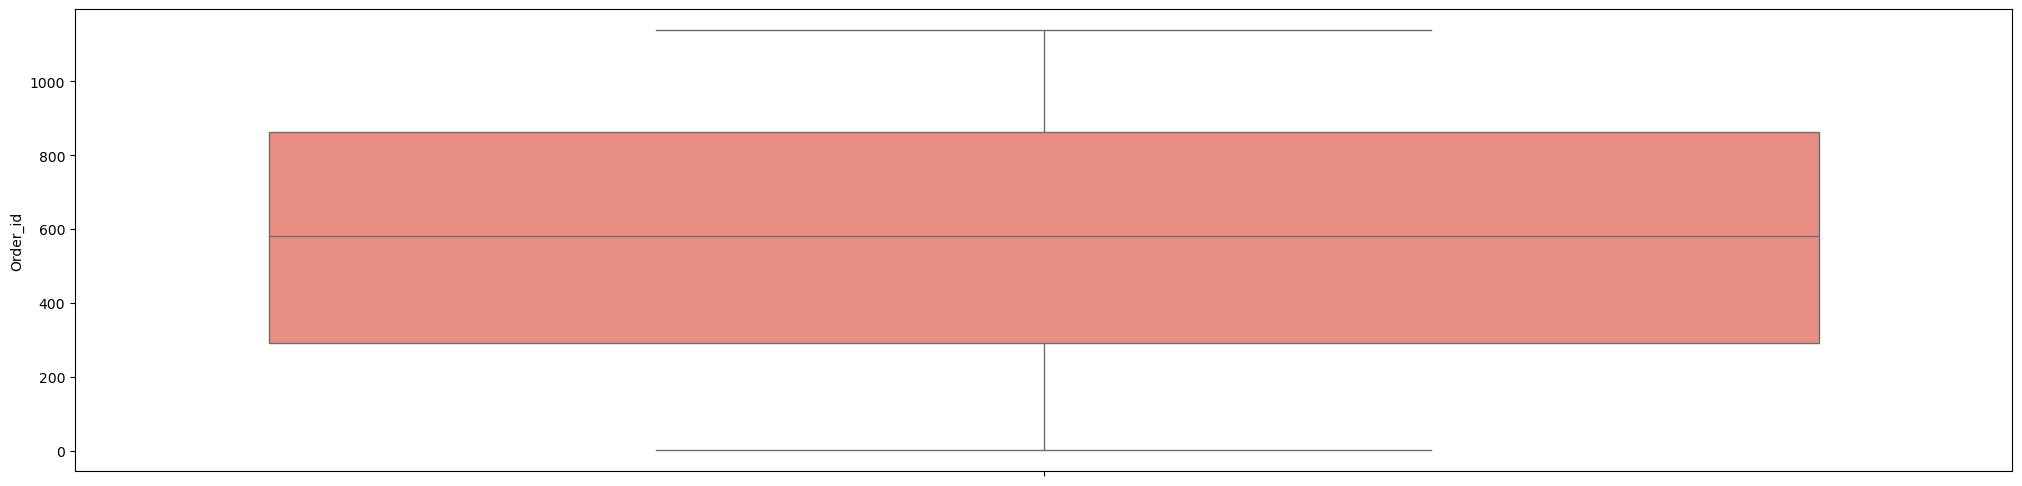

In [71]:
# Boxplot
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        plt.figure(figsize=(25,6))
        sns.boxplot(df[column], color='Salmon')
        plt.show()

C:\Users\Harsh Patel\AppData\Local\Temp\ipykernel_19908\4148979132.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


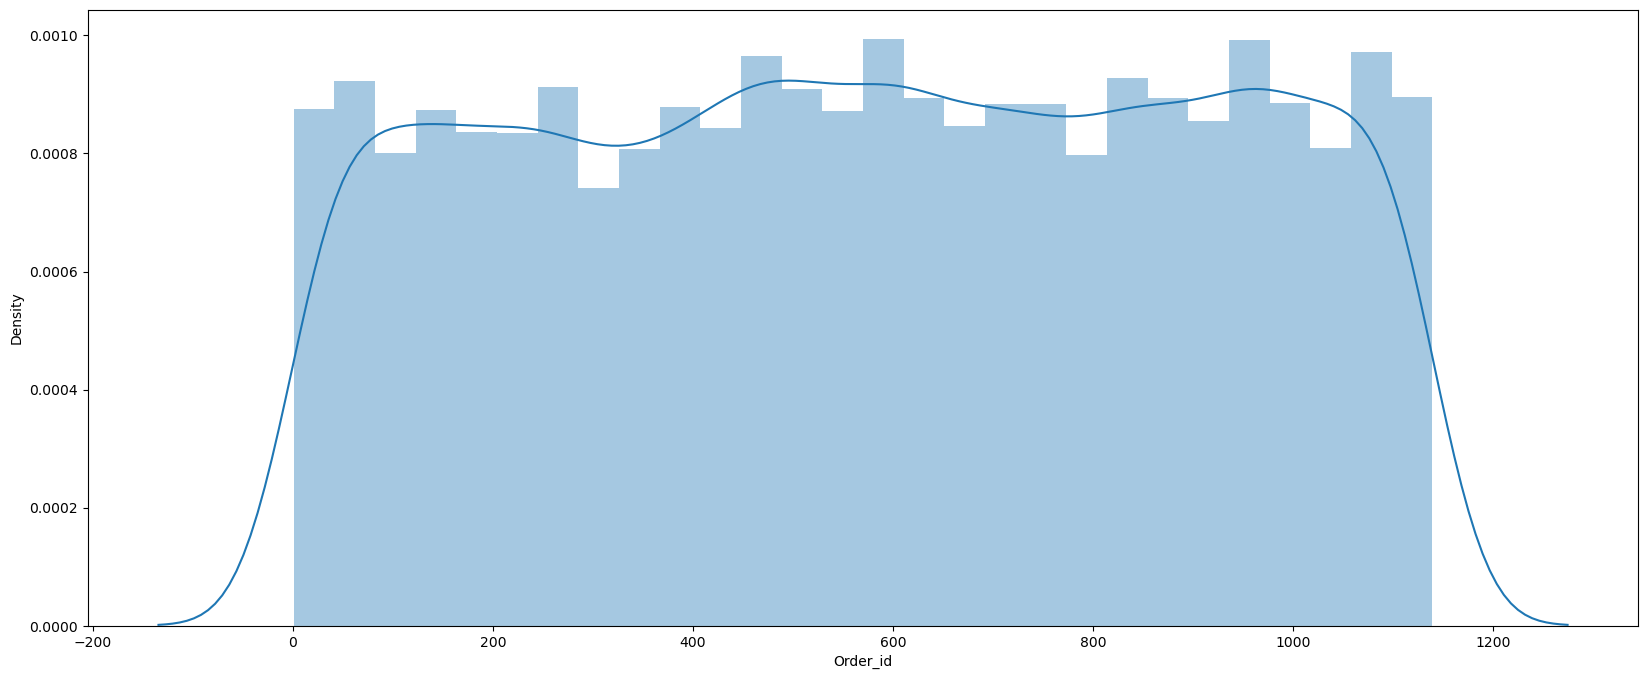

In [73]:
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        plt.figure(figsize=(20,8))
        sns.distplot(df[column])
        plt.show()